# Exercise 1: MD simulations of LJ-Ag

## SVOLGIMENTO PUNTO 2

---

## Consegna

### Parametri

In all simulations model Ag interatomic interactions using the LJ potential ($\varepsilon = 0.345$ eV and $\sigma = 2.644$ Å) with the cutoff radius at $R_C = 4.5$ Å. Assume $t_\text{th} = 3$ ps as thermalization time and use the simulation cell of 256-atoms (file `fcc100a256.txt` on the elearning page) unless stated differently. From point 3,

### Punto 1 ✅

Use a **sharp-cutoff** (no polynomial junction) approach and find the optimal timestep to perform a simulation from an initial temperature $T_\text{ini} = 50$ K. The optimal timestep is the maximum one such that $\frac{\delta E}{E} < 10^{−5}$. Consider the range 1, 25 fs and perform 5000 integration steps for each trial. Repeat the analysis for $T_\text{ini} = 500$ K and show that the criterion cannot be fulfilled however reducing the timestep.

#### Dall'analisi

Risulta un $dt$ ottimale di 20 fs per T=50

### Punto 2 ✅

Implement a **7-degree polynomial** junction for $R_P < r < R_C$ with $R_P = 4.2$ Å. Use the coefficients $A, B, \dots, H$ for the 0th, 1st, ..., 7th degree term respectively, as provided in the file `poly7.py` on the elearning page. Adapt the definition of forces accordingly. Check that for $T_\text{ini} = 50$ K the simulation is consistent with the sharp-cutoff one and find the optimal timestep for $T_\text{ini} = 500$ K, $1000$ K and $2000$ K.

#### Dall'analisi

La simulazione con giunzione polinomiale a T=50 è consistente a quella con shar-cutoff. La cosa interessante è che a 500K, usando la giunzione polinomiale, si riesce a scendere sotto il valore di tolleranza di $\frac{\delta E}{E} < 10^{−5}$

Risultano $dt$ ottimali di 20, 6, 4, 3 fs rispettivamente per T = 50, 500, 1000, 5000

### Punto 3 🛠️

For the following points, implement a steepest-descent procedure to start the simulation from a minimum energy configuration (use C= 0.005 Å/𝑒𝑉 and stop when the maximum force falls below 0.001 𝑒𝑉/Å).


Using the optimal timesteps found in point 2, perform 10 𝑝𝑠 long simulations for $T_\text{ini} = 500$ K, $1000$ K and $2000$ K. Plot $\langle T \rangle$ as a function of $T_\text{ini}$ , check if the condition $\langle T \rangle = \frac{T_\text{ini}}{2}$ is
fulfilled and explain the result. Visualize the atomic trajectories of the atoms at the center of the
cluster and at the cube vertices for both the lowest and highest temperature and comment on
their difference.

---

## Svolgimento PUNTO 3

### 0) Importazioni e dati

In [1]:
import numpy as np
import sys
sys.path.append('../../') 
from libraries.CrystalStructure import CrystalStructure as Crystal
from libraries.CrystalDynamics import CrystalDynamics as Dynamics

In [2]:
# Nome del file (numero di atomi da studiare: 256)
filename = '../../../data/pos-fcc100-random/fcc100a256.txt'

#### Dati globali

In [3]:
# temperature da studiare
temperature = [500, 1000, 2000]

# massa atomica dell'atomo considerato (argento)
silver_mass = 108

# ogni temperatura ha un time step ottimale differente
time_step = {
    50: 20e-15,
    500: 6e-15,
    1000: 4e-15,
    2000: 3e-15
}

# il numero di step è dato dal tempo totale (20ps) diviso il time step
tempo_totale = 20e-12
n_steps = {
    50: int(tempo_totale / time_step[50]),
    500: int(tempo_totale / time_step[500]),
    1000: int(tempo_totale / time_step[1000]),
    2000: int(tempo_totale / time_step[2000])
}

# tempo di termalizzazione (ogni valore precedente va buttato)
t_th = 3e-12

### 1) Configurazione a energia minima con steepest-descend

In [4]:
from libraries.SteepestDescend import SteepestDescend
# per mantenere il codice senza rieseguirlo inutilmente 
già_fatto_steepest = False

In [5]:
# come nella richiesta
C_steep = 0.005
F_tol = 0.001
max_steps = 20000

In [6]:
# Inizializza la struttura cristallina dal file
if not già_fatto_steepest:
    cristallo_iniziale = Crystal.from_file(filename)
    cristallo_iniziale.set_R_C(4.5)
    cristallo_iniziale.set_R_P(4.2)
    # Esegue minimizzazione con algroritmo di steepest-descend 
    # (598 step con questi parametri)
    steepest = SteepestDescend(cristallo_iniziale)
    potential_energies, max_forces = steepest.minimize_energy(C_steep=C_steep,
                                                                F_tol=F_tol,
                                                                max_steps=max_steps,
                                                                pol_junction=True)
    # FIXME: salva i risultati su file per non doverli ricalcolare
    # già_fatto_steepest = True 

⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5 e R_P=4.2.























































































































































































































































































































































































































































































































































































































Converged in 598 steps.


### 2) Simulazioni di 10ps a T = 500, 1000, 2000

In [ ]:
# Raccolgo le energie medie e le dev std
E_tot_means = {}
E_tot_stds = {}

E_tot_list = {}
E_k_list = {}
T_list = {}

for T in temperature: # in realtà una sola T iniziale: 50 K
    print(f"\n=== Simulazioni per temperatura iniziale T = {T} K ===")
    print(f"Time step: {time_step[T]*1e15} fs, Numero di step: {n_steps[T]}")
        
    # Ogni volta copio il cristallo iniziale in configurazione minimizzata
    # R_C e R_P sono già settati
    cristallo = cristallo_iniziale.copy()

    simulazione = Dynamics(cristallo, atomic_mass=silver_mass, dt=time_step[T], temp_ini=T)
    simulazione.set_seed(12316543)
    meta_E_tot, meta_E_k, meta_T = simulazione.run_dynamics(n_steps=n_steps[T], t_th=t_th, output=False, debug=False)
    
    E_tot_means[T] = np.mean(meta_E_tot)
    E_tot_stds[T] = np.std(meta_E_tot)
    
    E_tot_list[T] = meta_E_tot
    E_k_list[T] = meta_E_k
    T_list[T] = meta_T


=== Simulazioni per temperatura iniziale T = 500 K ===
Time step: 6.0 fs, Numero di step: 3333










































































































































































































































































































































































































































































































































































































































































































































































































































































































































#### 3) Analisi e plot di $\langle T \rangle$

Plot $\langle T \rangle$ as a function of $T_\text{ini}$ , check if the condition $\langle T \rangle = \frac{T_\text{ini}}{2}$ is
fulfilled and explain the result.

In [8]:
# per comodità salvo le T medie in una lista
T_means = [np.mean(T_list[T]) for T in temperature]

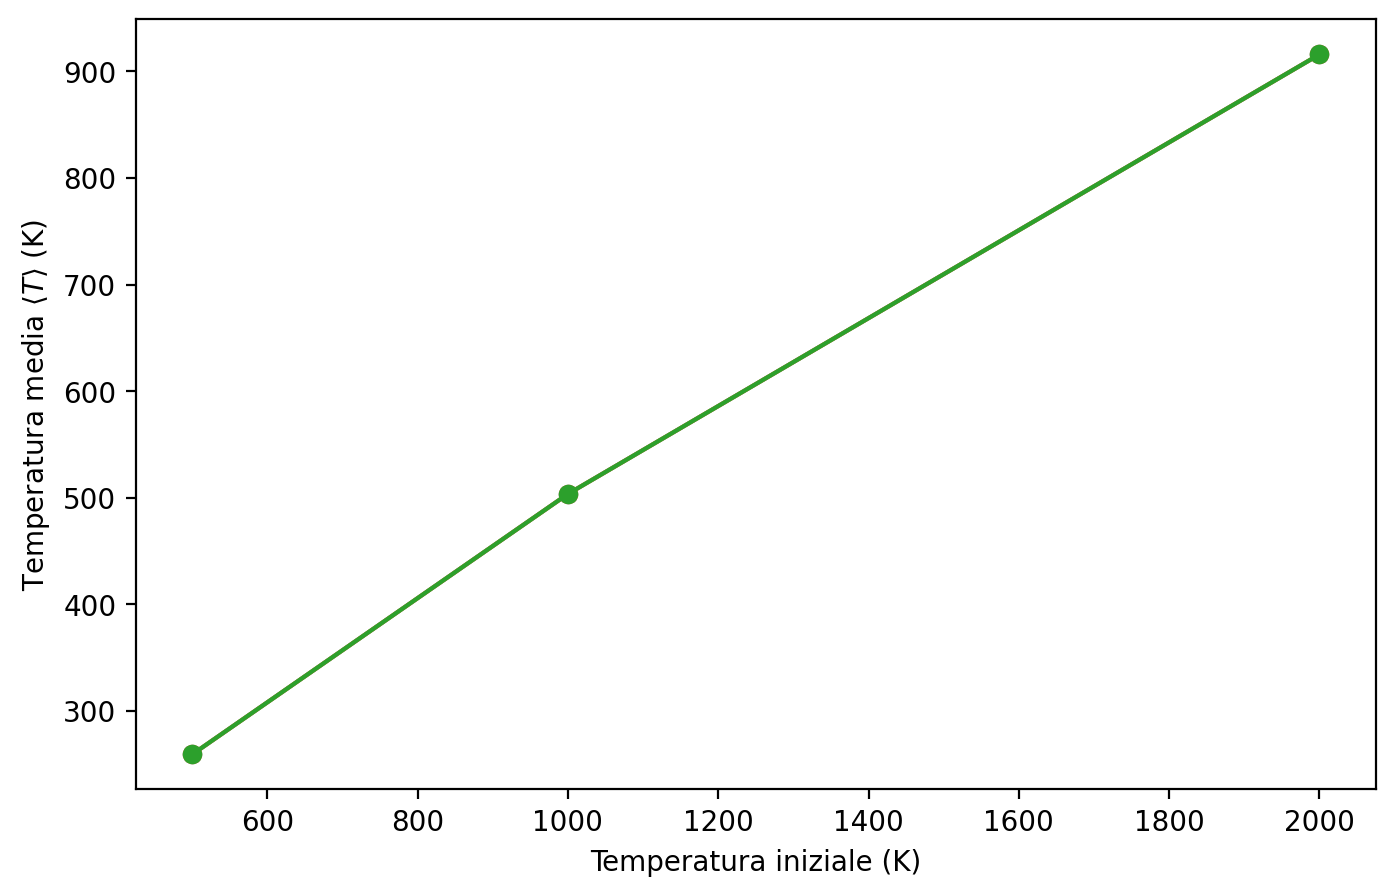

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=200)

for T in temperature:
    
    plt.plot(temperature, T_means, 'o-', label='Temperatura media simulata')
    
plt.xlabel('Temperatura iniziale (K)')
plt.ylabel('Temperatura media $\langle T \\rangle$ (K)')
plt.show()
    